<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [13]:
import pandas as pd

In [15]:
BFI_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv') # เพื่อดึงข้อมูลจากในเน็ตเข้า
BFI_data.head() # A2 A3 เป็นเเบบสอบถามทางจิตวิทยา NaN คือไม่ได้กรอกมา

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


#Factor aAnalysis'
Assumptions : \
ในข้อมูล mutilative ที่มีตัวแปร Ocserve varible จำนวน n ตัว\
มีตัวแปร Favctor (Larent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ \
โดย k<n

Assumptions ในการทำ Factor Analysis:\

There are no outlier in data. ต้องไม่มีเอาท์ไลน์เออร์\
Sample size should be greater than the factor. จำนวนdata ควรมากกว่า จำนวน factor\
There should not be perfect multicollinearity. ต้องไม่มี multicollinearity คือ data ที่มาจากsource เดียวกัน
There should not be homoskedasticitybetween the variables. ต้องไม่มี homoskedasticity


**การทำ Factor Analysis**

In [23]:
import factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt # พร็อตกราฟ

SyntaxError: ignored

In [ ]:

เเก้ error

ModuleNotFoundError

In [21]:
วิธี install package อื่นๆ

SyntaxError: ignored

In [22]:

!pip install factor_analyzer

     |████████████████████████████████| 40kB 2.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=2827f8ef21b56e64d97c5df7688cde7fbf626ca4daf70423f9d13d52067bb06c
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [24]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt # = from matplotlib import pyplot as plt


#Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...o3,o4,o5 ด้วยคำสั่ง .iloc[]

In [25]:
BFI_data_dropped = BFI_data.iloc[:,1:26] # เอาทุกเเถวเลยไม่เอาคอลัมน์เเรกเเละสามคอลัมน์สุดท้าย
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [26]:
BFI_data_dropped = BFI_data_dropped.dropna() # ดร็อปตัวที่เขาไม่ตอบ/กรอก ออก
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,3.0,5.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [27]:
BFI_data_dropped.shape #ดูขนาด

(2436, 25)

## Bartlett’s test 

In [29]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
# import ฟังก์ชันมา
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value # ถ้ามีค่าเป็น 1 ไม่สามารถใช้ได้

(18170.966350869243, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

#Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 เเปลวา่ข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [30]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)
kmo_model # ถ้าน้อยกว่า 0.6 เเปลว่า data ไม่เหมาะสม

0.8485397221949221

## Factor Analysis

In [31]:
from factor_analyzer import FactorAnalyzer

## Define

In [34]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [35]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [36]:
data_fa.shape

(2436, 20)

## วิธีตัดสินว่าเราจะลดเหลือกี่ dimesion (มี factor ทั้งหมดกี่ตัว)

In [37]:
ev,v = fa.get_eigenvalues() # คำนวนหา eigen value

### ใช้ eigen values 

In [38]:
ev


array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

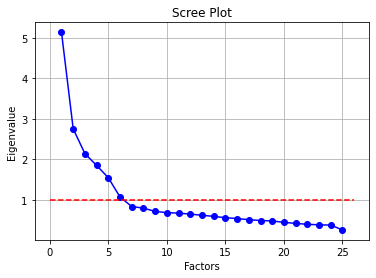

In [39]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()  ## eigen values มีค่าเกิน 1 เเปลว่า factors ใช้อธิบายข้อมูลได้ เหตุผล เพราะอาจจะมีจำนวนข้อมูลที่เยอะเเล้วดูยาก

In [40]:
data_fa[:,:4]  #เอาตั้งเเต่ 0-4

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311]])

## Factor loading

In [41]:
fa.loadings_.shape # 25 ตัวเเปร factor ที่คำนวณ 20 มีอิทธิพลมากน้อยเเค่ไหน

(25, 20)

In [45]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [46]:
fa2.loadings_.shape # ตัวเเปรใน25ตัว ตัวไหนถูกอธิบายด้วยตัวไหน

(25, 6)

## Plot factor loadings 

In [ ]:
เเบบที่ 1

In [47]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

## matrix plot

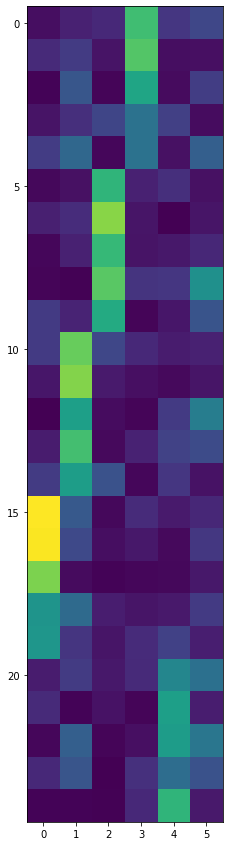

In [48]:
matplotlib.rcParams['figure.figsize']=[15,15] # ทำให้กราฟใหญ่ขึ้น
plt.imshow(np.absolute(fa2.loadings_)) # ค่ายิ่งมากเป็นสีสว่าง ค่าน้อยเป็นสีเข้ม 

In [ ]:
เเบบที่ 2

## กราฟเเท่ง

In [49]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

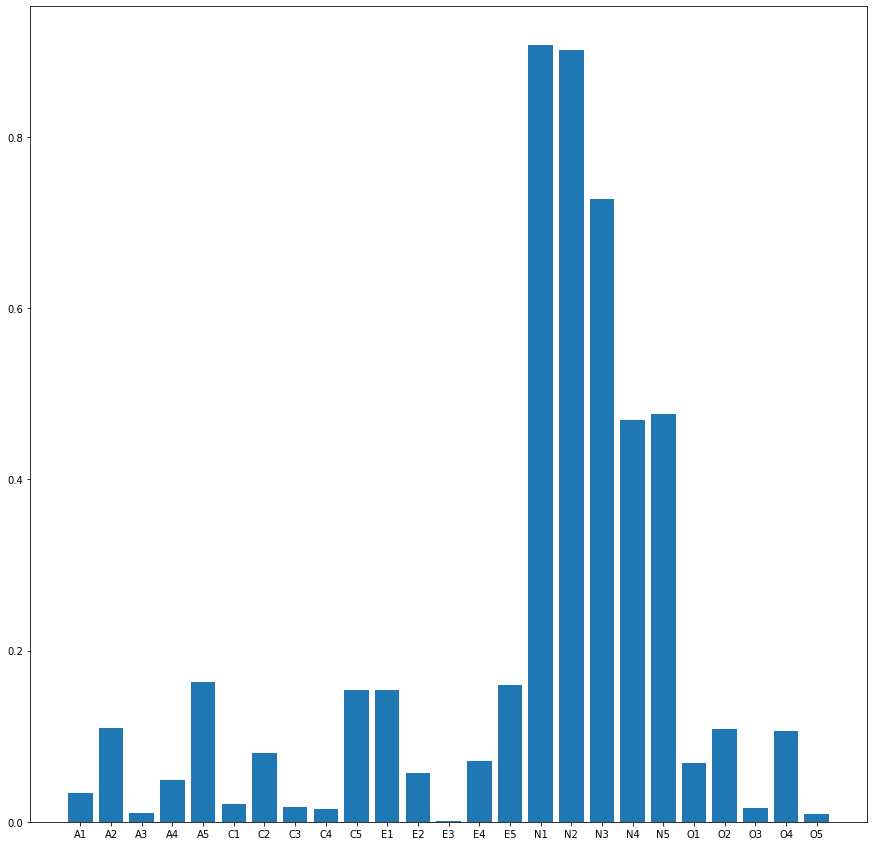

In [50]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'])  # bar -> bar chart กราฟเเท่ง ตัวเเปรสูงๆอยู่กลุ่มเดียวกัน 


Exam 3 
ทำ Factor Analysis จากข้อมูล Fifa 2018 


https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view

**Load data**

In [54]:
import pandas as pd

In [55]:
FIFA_data = pd.read_csv('FIFA 2018 Statistics.csv') # โหลดdataเข้ามา
FIFA_data.head(10)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,0,22,2,86,194,100,14,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,1,13,2,87,366,102,12,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,3,13,0,93,727,103,10,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,0,19,1,87,484,103,16,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,0,16,4,85,390,111,19,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


## การทำ Factor Analysis

**วิธี install package อื่นๆ**

In [56]:
!pip install factor_analyzer

In [57]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [58]:
FIFA_data_dropped = FIFA_data.iloc[:,3:-7] # เอาทุกเเถวเลยไม่เอาคอลัมน์เเรกเเละสามคอลัมน์สุดท้าย
FIFA_data_dropped

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [59]:
FIFA_data_dropped = FIFA_data_dropped.dropna() # ดร็อปตัวที่เขาไม่ตอบ/กรอก ออก
FIFA_data_dropped


,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [60]:
FIFA_data_dropped.shape  #ดูขนาด

(128, 17)

**Bartlett’s test**

In [61]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
# import ฟังก์ชันมา
chi_square_value,p_value=calculate_bartlett_sphericity(FIFA_data_dropped)

chi_square_value, p_value  #ต้องมีค่าไม่เท่ากับ 1 

(1299.3697851171412, 2.713580160466225e-189)

จาก Bartlett ’s test, p-value เท่ากับ 2.713580160466225e-189 ซึ่งน้อยกว่าระดับนัยสำคัญ หมายความว่า ตัวเเปรเเต่ละตัวไม่มีความสัมพันธ์กัน

**Kaiser-Meyer-Olkin (KMO) Test**
 

In [62]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(FIFA_data_dropped)
kmo_model #  ถ้าค่า KMO model มีค่ามากกว่า 0.6 เเปลวา่ข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

0.5594556344508279

เนื่องจาก ค่า KMO model มีค่าน้อยกว่า 0.6 หมายความว่าข้อมูลไม่เหมาะ ที่นำไปทำ Factor Analysis

**Factor Analysis**

In [ ]:
from factor_analyzer import FactorAnalyzer

**Define**

In [63]:
fa = FactorAnalyzer(n_factors=16)

**Fit-transform**

In [64]:
data_fa = fa.fit_transform(FIFA_data_dropped)

In [65]:
data_fa.shape

(128, 16)

**วิธีตัดสินว่าเราจะลดเหลือกี่ dimesion (มี factor ทั้งหมดกี่ตัว)**

In [66]:
ev,v = fa.get_eigenvalues() # คำนวนหา eigen value

**ใช้ eigen values**

In [67]:
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

##**scree plot คือ เอาไว้เเสดงว่า factors มี eigen values เท่าไหร่**

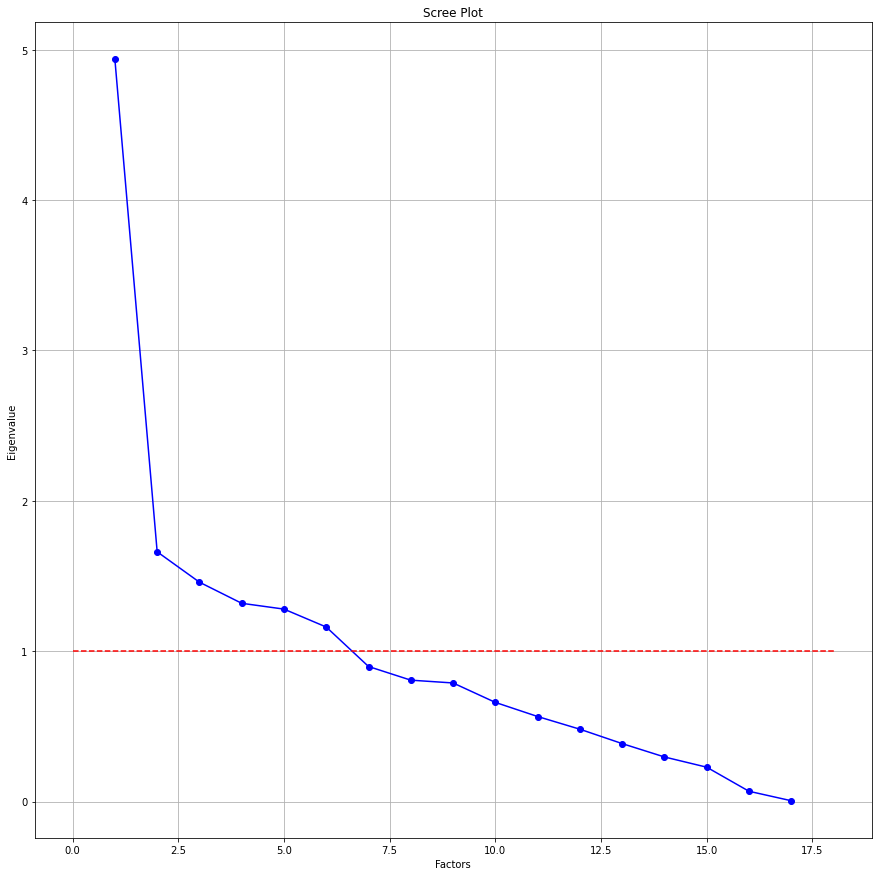

In [68]:
# Create scree plot using matplotlib
plt.plot(range(1,FIFA_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,FIFA_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()  ## eigen values มีค่าเกิน 1 เเปลว่า factors ใช้อธิบายข้อมูลได้ เหตุผล เพราะอาจจะมีจำนวนข้อมูลที่เยอะเเล้วดูยาก

In [69]:
data_fa[:,:6]  #เอาตั้งเเต่ 0-6  เนื่องจากจะเอาเเต่ factor ที่มากกว่า 1 

array([[-1.02852235e+00,  6.84121245e-01,  2.62286805e+00,
        -6.13275893e-02, -5.44092674e-02,  2.00934276e-01],
       [ 7.27448293e-01, -5.24186679e-01, -1.07869132e+00,
        -8.50925779e-01, -2.41176630e-01,  2.50883401e-01],
       [-6.45675050e-01,  1.82115619e-01, -5.69637077e-01,
         2.26028940e-01,  3.37982843e-02, -1.68147976e-01],
       [ 7.47704941e-01,  1.72940207e-01, -2.02499240e-01,
        -1.29479087e+00, -1.29504953e-01, -5.66581441e-02],
       [ 7.64590473e-01, -1.02338004e+00, -2.54183776e-01,
         6.17252933e-01,  1.72354639e-01,  2.04944359e-01],
       [-1.37927654e+00, -1.02367999e+00, -1.18075480e-01,
         9.43416646e-01, -7.19004216e-01, -5.47973852e-01],
       [-7.75361184e-01, -5.36622975e-01,  8.32824491e-01,
        -2.23469488e-01,  1.60618514e-01, -8.09773397e-02],
       [ 1.44271720e+00, -9.83264072e-02,  1.09942840e+00,
        -5.21200358e-01, -4.13879311e-01,  9.66101100e-02],
       [ 1.77079119e-01, -3.68717730e-01,  9.499

** Factor loading**

รัน Factor analyzer อีกรอบ ด้วย parameters จำนวน เท่ากับ 6

In [70]:
fa.loadings_.shape # 17 ตัวเเปร factor ที่คำนวณ 16 มีอิทธิพลมากน้อยเเค่ไหน

(17, 16)

In [71]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(FIFA_data_dropped)

In [72]:
fa2.loadings_.shape 

(17, 6)

**Plot factor loadings**

##แบบที่1 

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

##matrix plot

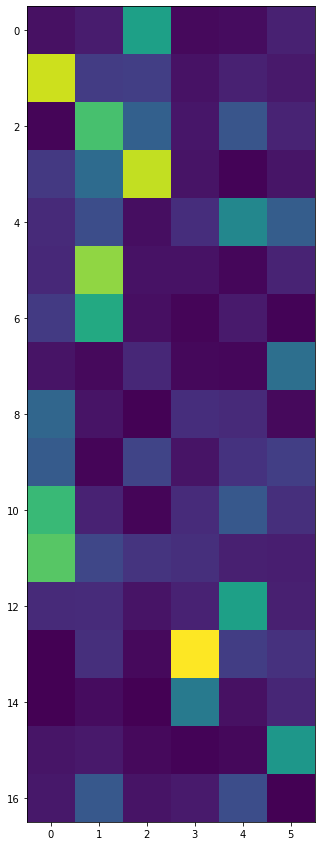

In [73]:
matplotlib.rcParams['figure.figsize']=[15,15] # ทำให้กราฟใหญ่ขึ้น
plt.imshow(np.absolute(fa2.loadings_)) # ค่ายิ่งมากเป็นสีสว่าง ค่าน้อยเป็นสีเข้ม

#แบบที่2

##กราฟแท่ง

In [74]:
FIFA_data_dropped.columns # เอาชื่อหัวตารางที่ใช้มา

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

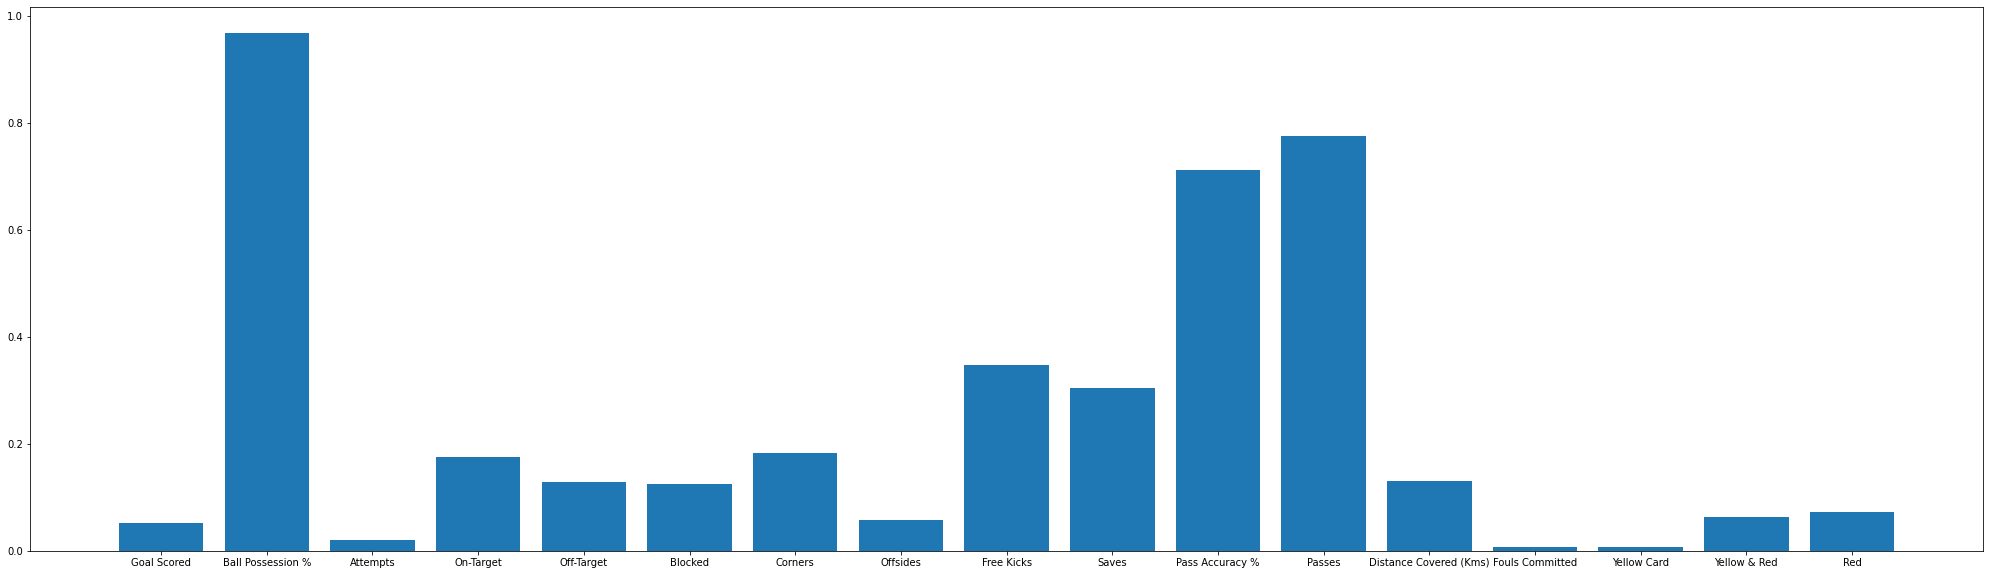

In [75]:
 plt.subplots(figsize=(35,10)) # ไว้ขยาย size กราฟเเท่ง (ความกว้าง,ความยาว)
plt.bar(range(17),np.absolute(fa2.loadings_[:,0]),tick_label=['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'])  # bar -> bar chart กราฟเเท่ง ตัวเเปรสูงๆอยู่กลุ่มเดียวกัน

พบว่า กราฟเเท่งที่มีสูง มักจะอยู่กลุ่มเดียวกัน  เช่น Ball Possession % ,Pass Accuracy % เเละ Passes 